In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output  # for callbacks
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
app = dash.Dash()

In [4]:
df_1952 = df[df.year == 1952]
type(df.year), type(df['year'])

(pandas.core.series.Series, pandas.core.series.Series)

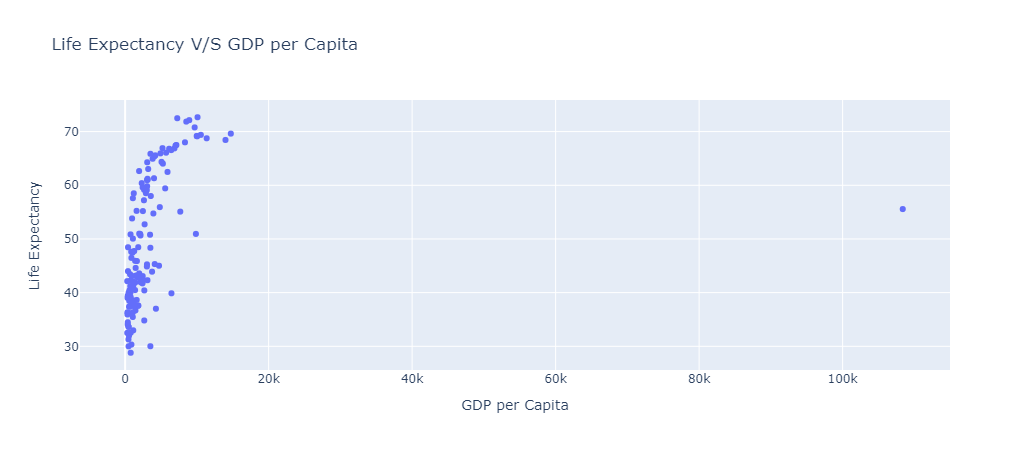

In [5]:
figure = {
    'data' : [go.Scatter(x = df_1952.gdpPercap,
                         y = df_1952.lifeExp,
                         text= df_1952.country,
                         mode='markers',
                        )],
    'layout': {
        'title': 'Life Expectancy V/S GDP per Capita',
        'xaxis' : {'title' : 'GDP per Capita'},
        'yaxis' : {'title' : 'Life Expectancy'}
    }
}
offline.iplot(figure)

Above data and graph represent only single year data, We need to select the year using the slider and pass the year to graph object

In [6]:
app.layout = html.Div([
    dcc.Graph(id = 'graph-with-slider'),
    dcc.Slider(id = 'year-slider',
               min = min(df['year']),
               max = max(df['year']),
               value = min(df['year']),
               marks= {str(year): year for year in df['year'].unique()},
               step=None
              ),
    html.Br(),
    html.Div(id = 'html-output')
])

In [7]:
@app.callback(
    output = Output(component_id='graph-with-slider', component_property='figure'),
    inputs = [Input(component_id='year-slider', component_property='value')]  # inputs must be list or tuple of dash.dependencies.Input
)
def update_graph_with_slider_value(selected_year):
    filterd_df = df[df['year'] == selected_year]
    traces = []
    for i in filterd_df.continent.unique():
        df_by_continents = filterd_df[filterd_df['continent'] == i]
        traces.append(
            go.Scatter(
                x = df_by_continents.gdpPercap,
                y = df_by_continents.lifeExp,
                text = df_by_continents.country,
                mode = 'markers',
                opacity =  0.6,
                # marker = {'size': 15, 'line': {'width': 0.5, 'color': 'white'} },
                marker={
                    'size': 15,
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name = i
            )
        )
    return {
            'data' : traces,
            'layout': {
                'title': 'Life Expectancy V/S GDP per Capita',
                'xaxis' : {'title' : 'GDP per Capita', 'type': 'log', 'range':[2.3, 4.8]},
                'yaxis' : {'title' : 'Life Expectancy', 'range': [20, 90]},  # range shows the axis marks
                'hovermode' : 'closest',
                'transition' : {'duration': 200},
                'margin' : {'l': 40, 'b': 10, 't': 40, 'r': 10},  # set the marging of the graph in pixel in left, bottom, top, right
                'legend' : {'x': 0, 'y': 1},  # it will chagne the location of legends
            }
    }

In [8]:
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: development
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
